In [354]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import operator
import math

In [478]:
class GA(object):
  def __init__(self, num_population):
    self.num_population = num_population

  def population(self):
    return [np.random.randint(0, 2, 5) for i in range(self.num_population)]

  def binary2int(self, population):
    binary = np.random.randint(0, 1, self.num_population)
    for i, pop in enumerate(population):
      pop = pop.tolist()
      pop = "".join(str(elem) for elem in pop)
      binary[i] = int(pop, 2)
    return binary

  def solve(self, population, func):
    return [func(pop) for pop in population]

  def selection(self, population, solve):
    solve = np.array(solve)
    solve = np.abs(500-solve)
    zipped = zip(population, solve)
    zipped = sorted(zipped, key=operator.itemgetter(1))
    population, solve = zip(*zipped)
    solve = np.array(solve)
    population = np.array(population)
    #mean = np.mean(solve)
    #parrent = population[solve<=mean]
    size = round(len(population)*0.1)
    parrent = population[:size]
    population = [self.crossover(parrent) for i in range(self.num_population)]
    population = self.mutation(population, 0.2)
    return population
     
  def crossover(self, population):
    male = rn.choice(population)
    if len(population) > 1:
      np.delete(population, male)
    female = rn.choice(population)
    #size = np.random.randint(1, male.size)
    #kind = np.concatenate((male[:size], female[-(male.size-size):]))
    child = np.random.randint(0, 2, len(male))
    for i, _ in enumerate(child):
      if rn.random() < 0.5 :
        child[i] = male[i]
      else:
        child[i] = female[i]
    return child

  def mutation(self, population, chance):
    if rn.random() < chance:
      i = rn.choice(np.arange(len(population)))
      j = rn.choice(np.arange(len(population[i])))
      population[i][j] = int(not population[i][j])
    return population

  def train(self, num_generations, func):
    population = self.population()
    for i in range(num_generations):
      binary = self.binary2int(population)
      solve = self.solve(binary, func)
      population = self.selection(population, solve)
    binary = self.binary2int(population)
    solve = self.solve(binary, func)
    self.plot(binary, solve)
    print("RESULT!")
    print(solve)

  def plot(self, X, Y):
    plt.scatter(X, Y)
    X = np.linspace(0, 100, 200)
    Y = [function(x) for x in X]
    plt.plot(X, Y)
   


In [469]:
def function(x):
  func = math.sin(x)*1000
  return func

RESULT!
[420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409, 420.1670368266409]


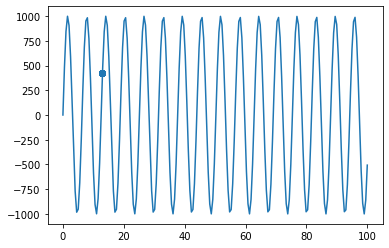

In [480]:
num_generations = 30
plt.show()
ga = GA(40)
ga.train(num_generations, function)
plt.show()